## 손글씨 숫자 식별 모델
---
- 데 이 터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동   작 : 0 ~ 9 사이 숫자 판별

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout , Flatten
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

### [1] 데이터 로딩 및 준비

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()

In [3]:
print(f'x_train.shape : {x_train.shape}, x_test.shape: {x_test.shape}')

x_train.shape : (60000, 28, 28), x_test.shape: (10000, 28, 28)


In [4]:
# 검증용 데이터 셋 준비
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, stratify=y_train)

In [5]:
print(f'x_train.shape : {x_train.shape}, x_val.shape: {x_val.shape}')
print(f'y_train.shape : {y_train.shape}, y_val.shape: {y_val.shape}')

x_train.shape : (45000, 28, 28), x_val.shape: (15000, 28, 28)
y_train.shape : (45000,), y_val.shape: (15000,)


### [2] 데이터 전처리
---
- 수치 데이터 => 스케일링
- 범주형 데이터 => 원핫인코딩

In [6]:
# 저장된 값 확인
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [7]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0~1.0으로 스케일링
# 5/255.    # numpy 브로드캐스팅
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0

In [8]:
# 타겟 라벨 => OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder

In [9]:
encoder=OneHotEncoder()
encoder.fit(y_train.reshape(-1, 1))
y_train=encoder.transform(y_train.reshape(-1, 1))

In [10]:
type(y_train)

scipy.sparse.csr.csr_matrix

In [11]:
y_train = y_train.toarray()
type(y_train)

numpy.ndarray

In [12]:
print(f' y_train : {type(y_train)}]\n y_train[0] : {y_train[0]}')

 y_train : <class 'numpy.ndarray'>]
 y_train[0] : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [13]:
y_test=encoder.transform(y_test.reshape(-1, 1))
y_val=encoder.transform(y_val.reshape(-1, 1))

In [14]:
y_test = y_test.toarray()
y_val = y_val.toarray()

### [3] 모델 생성
---
- (1) 모델 구성
- (2) 모델 생성

#### [3-1] 모델 구성
---
- 입력 데이터 : 784 => 28 * 28 이미지 데이터
- 출력 데이터 : 10  => 0 ~ 9 숫자 라벨
- 학습 방  법 : 분류 - 다중분류

In [15]:
model=Sequential(name='MNIST_NNModel')

In [16]:
model.add(Flatten(input_shape=(784, )))

In [17]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수, [옵]input_shape param
model.add( Dense(250, activation='relu', input_shape=(784,)))

In [18]:
model.add( Dropout(0.3))

In [19]:
model.add( Dense(100, activation='relu'))

In [20]:
model.add( Dropout(0.3))

In [21]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 갯수, 활성화함수
model.add( Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-t

#### [3-2] 모델 생성
---
- loss함수 => crossentropy
    * 이진분류 : binary_crossentropy
    * 다중분류 : sparse_categorical_crossentropy, categorical_crossentropy
- optimizer 기법 => 'rmsprop'
- matrics 평가항목 => 'loss'

In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics='accuracy')

### [4] 학습

In [24]:
x_train.shape

(45000, 28, 28)

In [25]:
x_train=x_train.reshape(-1,28*28)
x_train.shape, y_train.shape

((45000, 784), (45000, 10))

In [26]:
x_val=x_val.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [28]:
stopCB=EarlyStopping(monitor='val_loss', patience=2)

In [29]:
# MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.h5'   # modelFiles
# modelCB=ModelCheckpoint(filepath=MODEL_PATH, save_best_only=True,
#                        save_weights_only=True)

In [30]:
MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB=ModelCheckpoint(filepath=MODEL_PATH)

In [31]:
his=model.fit(x_train, y_train, epochs=10,
         validation_data=(x_val, y_val),
             callbacks=[stopCB, modelCB])

Epoch 1/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3487 - accuracy: 0.8945 - val_loss: 0.1496 - val_accuracy: 0.9549
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1700 - accuracy: 0.9492 - val_loss: 0.1213 - val_accuracy: 0.9641
Epoch 3/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1289 - accuracy: 0.9609 - val_loss: 0.1044 - val_accuracy: 0.9683
Epoch 4/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1100 - accuracy: 0.9662 - val_loss: 0.0914 - val_accuracy: 0.9737
Epoch 5/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0934 - accuracy: 0.9708 - val_loss: 0.0919 - val_accuracy: 0.9731
Epoch 6/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0850 - accuracy: 0.9741 - val_loss: 0.0939 - val_accuracy: 0.9737


In [32]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

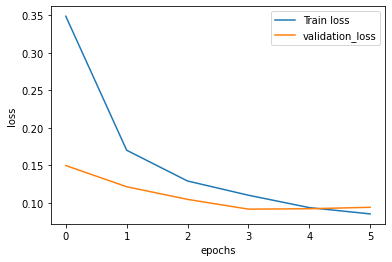

In [33]:
plt.plot(his.epoch, his.history['loss'], label='Train loss')
plt.plot(his.epoch, his.history['val_loss'], label='validation_loss')
plt.legend(['Train loss', 'validation_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

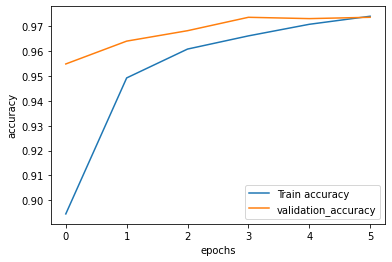

In [34]:
plt.plot(his.epoch, his.history['accuracy'], label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='validation_accuracy')
plt.legend(['Train accuracy', 'validation_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### [5] 평가
---
- evaluate() 메서드
    * test data, target
    * 반환값 : loss, metrics에서 지정한 성능평가항목

In [35]:
# model.save_weights()

In [36]:
test_result=model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0888 - accuracy: 0.9751


In [37]:
x_test[0].shape, type(x_test[0]), x_test[0].reshape(-1,784)

((784,),
 numpy.ndarray,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         

### [6] 테스트/예측

In [38]:
pre_label=model.predict(x_test[0].reshape(-1,784))

1/1 [==============================] - 0s 82ms/step


In [39]:
import numpy as np

np.round(pre_label, 2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [40]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [41]:
# import 추가 - 모델 도식화 기능
from tensorflow.keras.utils import plot_model

In [42]:
# 패키지 설치 추가
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


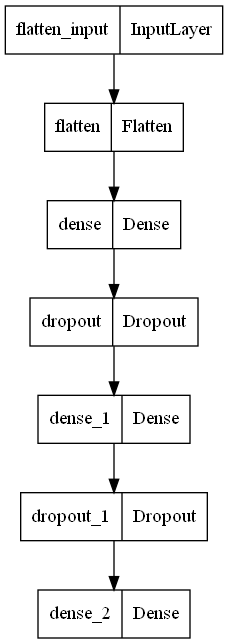

In [45]:
plot_model(model)

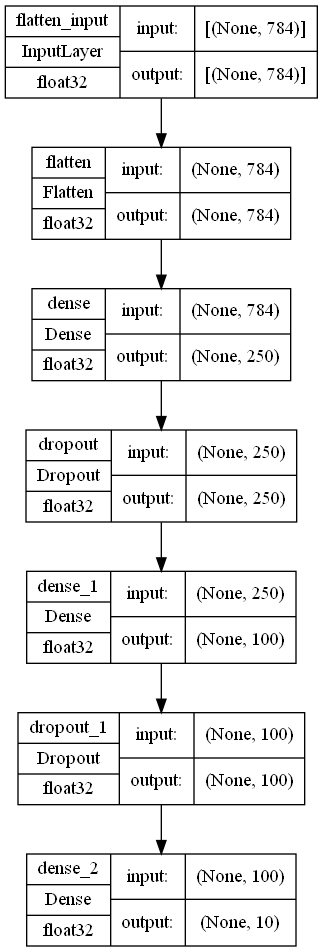

In [46]:
plot_model(model, show_shapes=True, show_dtype=True)